# SparseEdges tests

## A series of tests for the SparseEdges package


Table of content

* [What is the SparseEdges package?](#What-is-the-SparseEdges-package?) 
* [Installing](#Installing) 
* [testing one step](#testing-one-step)


In [1]:
#%load README.md

In [2]:
#import matplotlib
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
#matplotlib.rcParams.update({'text.usetex': True})
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)
# http://ipython.org/ipython-doc/stable/config/extensions/autoreload.html
#%load_ext autoreload
#%autoreload 2

# where should we store the figures generated by this notebook
figpath = '../../CNRS/BICV-book/BICV_sparse/src/'
figpath = ''

In [3]:
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges

In [4]:
#! defining framework
#!-------------------
pe = ParameterSet('default_param.py')
pe.N = 4
pe.do_mask=False
pe.MP_alpha=1.
pe.do_whitening = False
im = Image(pe)
lg = LogGabor(im)
mp = SparseEdges(lg)

## Defining units, axis and conventions

cardinal points in X, Y (clockwise):  E (=right=3 o'clock=horizontal), ESE, S, WSW, W, WNW, N, ENE :

In [5]:
X = np.array([0, 1./4, 1./2, 1./4, 0, -1./4, -1./2])#, -1./4])\n",
Y = np.array([1./2, np.sqrt(3)/4, 0, -np.sqrt(3)/4, -1./2, -np.sqrt(3)/4, 0.])#, np.sqrt(3)/
Theta = np.arctan2(-X, Y)  # perpendicular to circle
Theta = ((Theta + np.pi/2  - np.pi/pe.N_phi/2 ) % (np.pi)) - np.pi/2  + np.pi/pe.N_phi/2
print(['%0.1f' % (angle*180/np.pi) for angle in Theta])

['-0.0', '-30.0', '90.0', '30.0', '-0.0', '-30.0', '90.0']


We set the [0,0] index of the array in the upper left left corner of the axes.

The X, Y image axis are defined in the matrix style (origin on the upper left; X going vertically down, Y going right horizontally) - the angle is defined as the angle wrt to the horizontal axis :

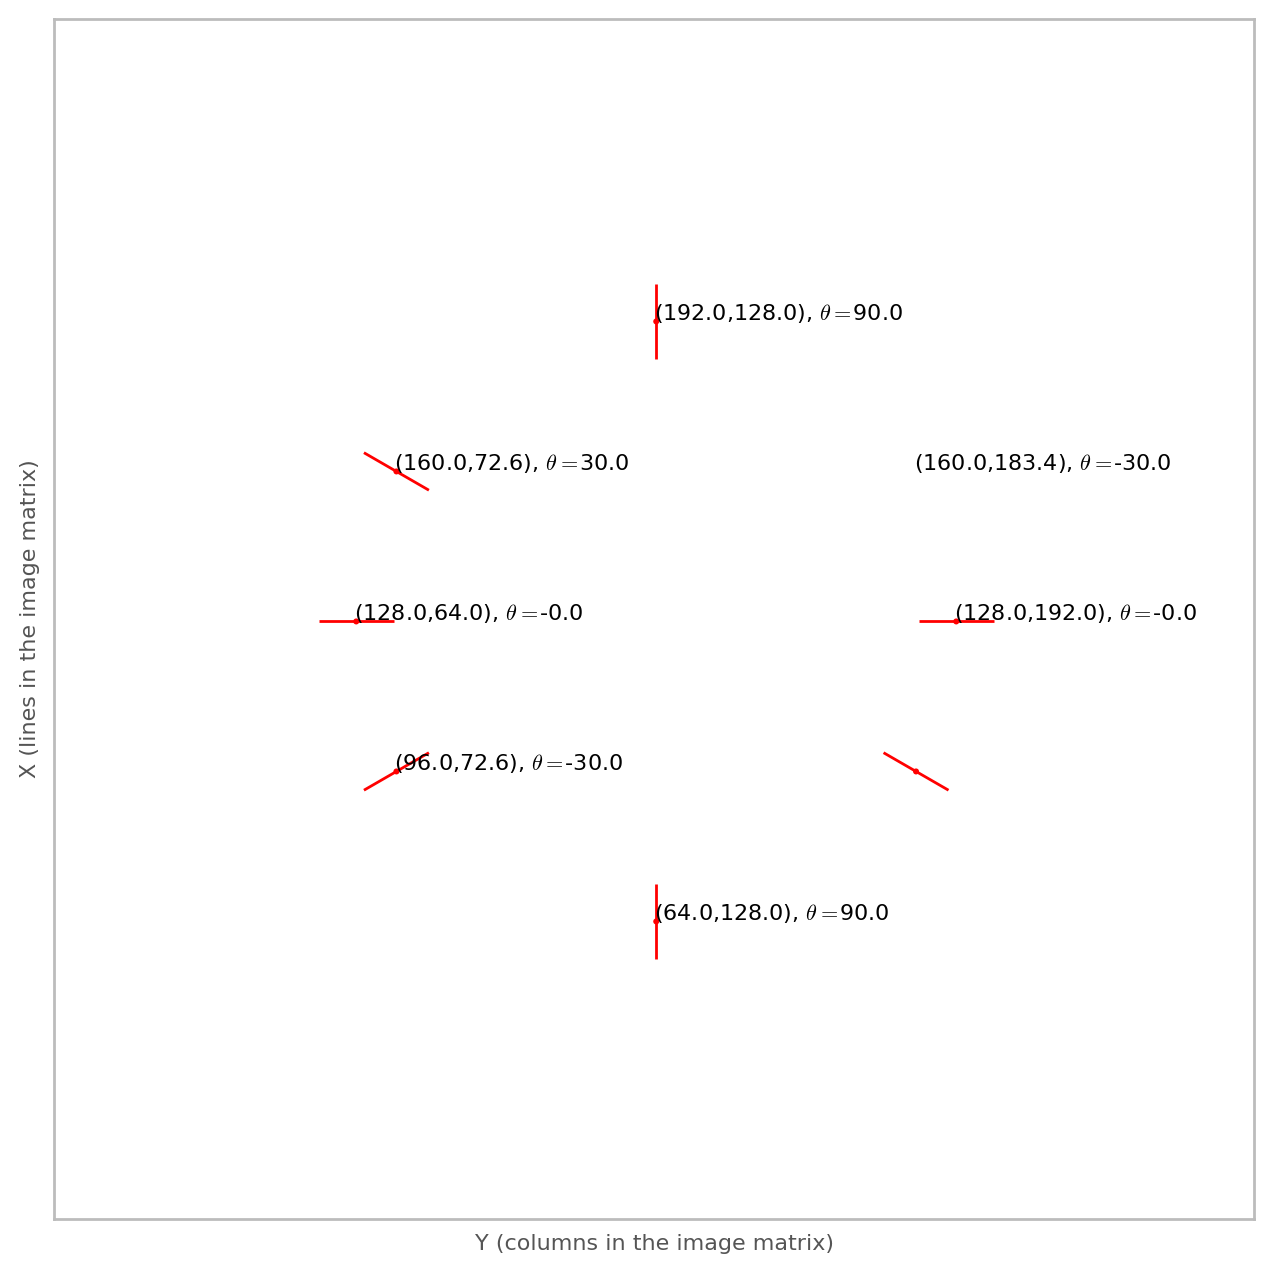

In [6]:
fig, a = mp.show_edges(np.vstack(((X/2. + .5)*pe.N_X, (Y/2. + .5)*pe.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) )))
t = [a.text(Y_, pe.N_X-X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*pe.N_X, (Y/2. + .5)*pe.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix)')
_ = a.set_ylabel('X (lines in the image matrix)')

Overlaying an image :

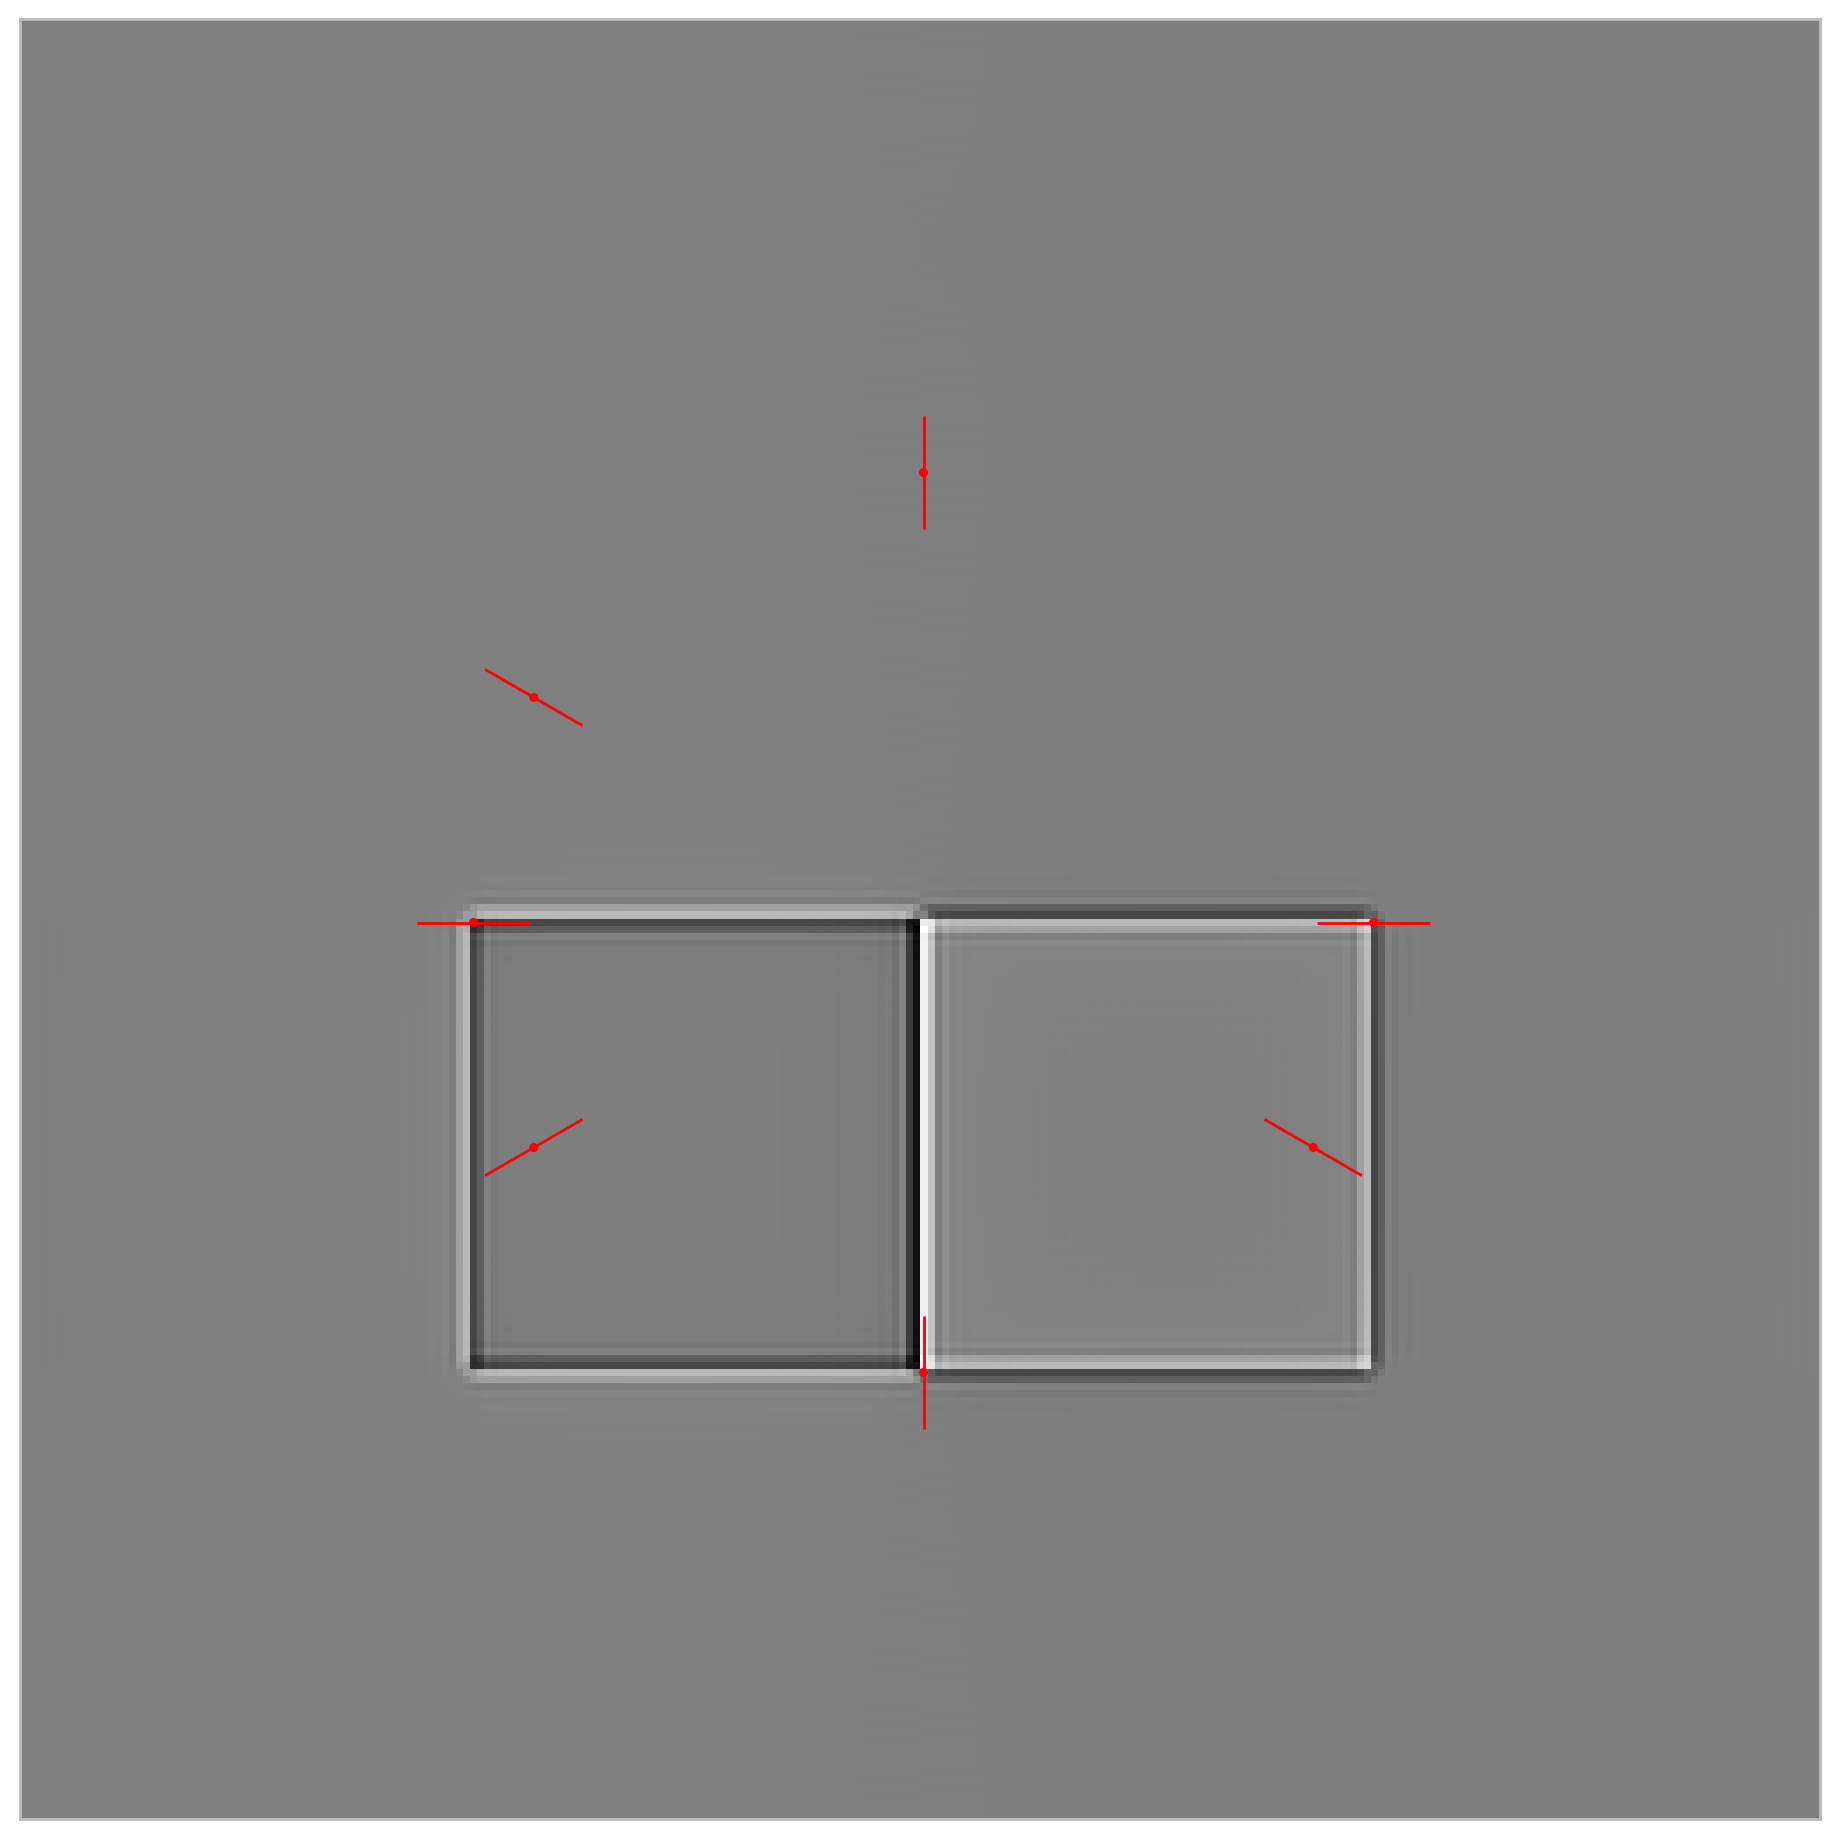

In [7]:
pe = ParameterSet('default_param.py')
pe.N = 128 # number of edges
pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((pe.N_X, pe.N_Y))
image[pe.N_X/2:pe.N_X/2+pe.N_X/4, pe.N_X/2:pe.N_X/2+pe.N_X/4] = 1
image[pe.N_X/2:pe.N_X/2+pe.N_X/4, pe.N_X/4:pe.N_X/2] = -1

im = Image(pe)
lg = LogGabor(im)
mp = SparseEdges(lg)
edges = np.vstack(((X/2. + .5)*pe.N_X, (Y/2. + .5)*pe.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

#fig, a = mp.show_edges(edges, image=image)
fig, a = mp.show_edges(edges, image=im.whitening(image))

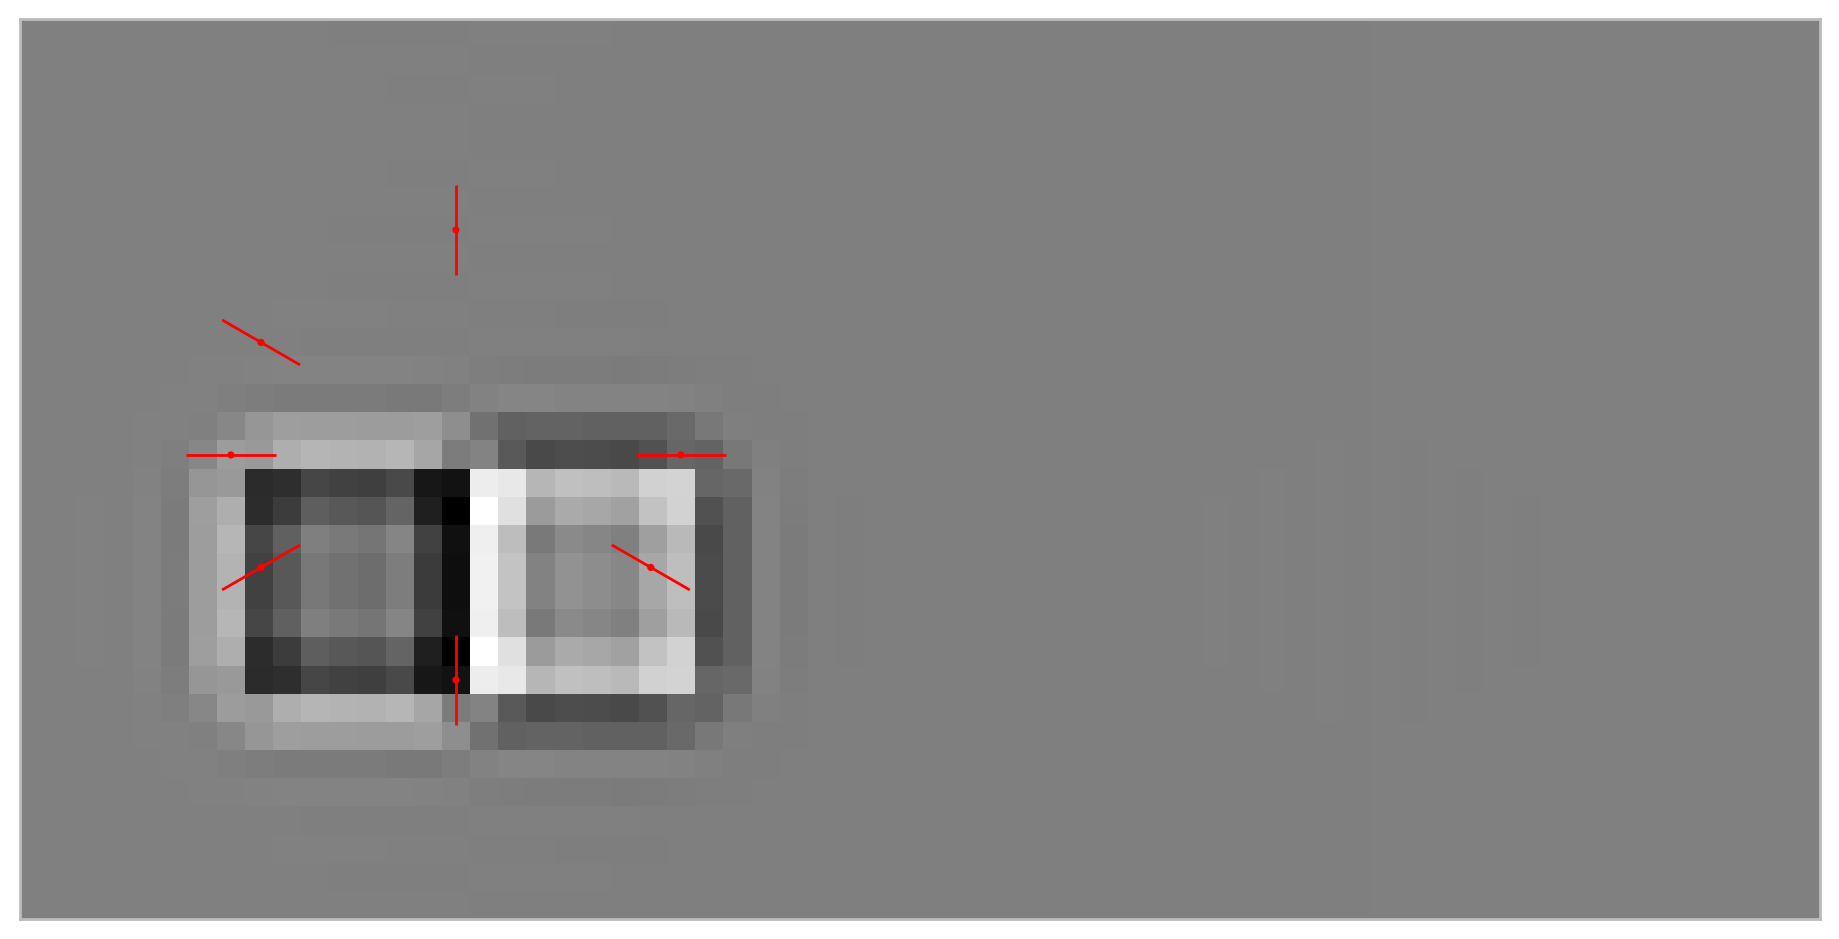

In [8]:
pe = ParameterSet('default_param.py')
pe.N_X = 32 
pe.N_Y = 64
pe.N = 128 # number of edges
pe.figsize_edges = 4.5

#! defining a reference test image (see test_Image)
image = np.zeros((pe.N_X, pe.N_Y))
image[pe.N_X/2:pe.N_X/2+pe.N_X/4, pe.N_X/2:pe.N_X/2+pe.N_X/4] = 1
image[pe.N_X/2:pe.N_X/2+pe.N_X/4, pe.N_X/4:pe.N_X/2] = -1

im = Image(pe)
lg = LogGabor(im)
mp = SparseEdges(lg)
edges = np.vstack(((X/2. + .5)*pe.N_X-1, (Y/2. + .5)*pe.N_X-1, Theta, .5*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=im.whitening(image))

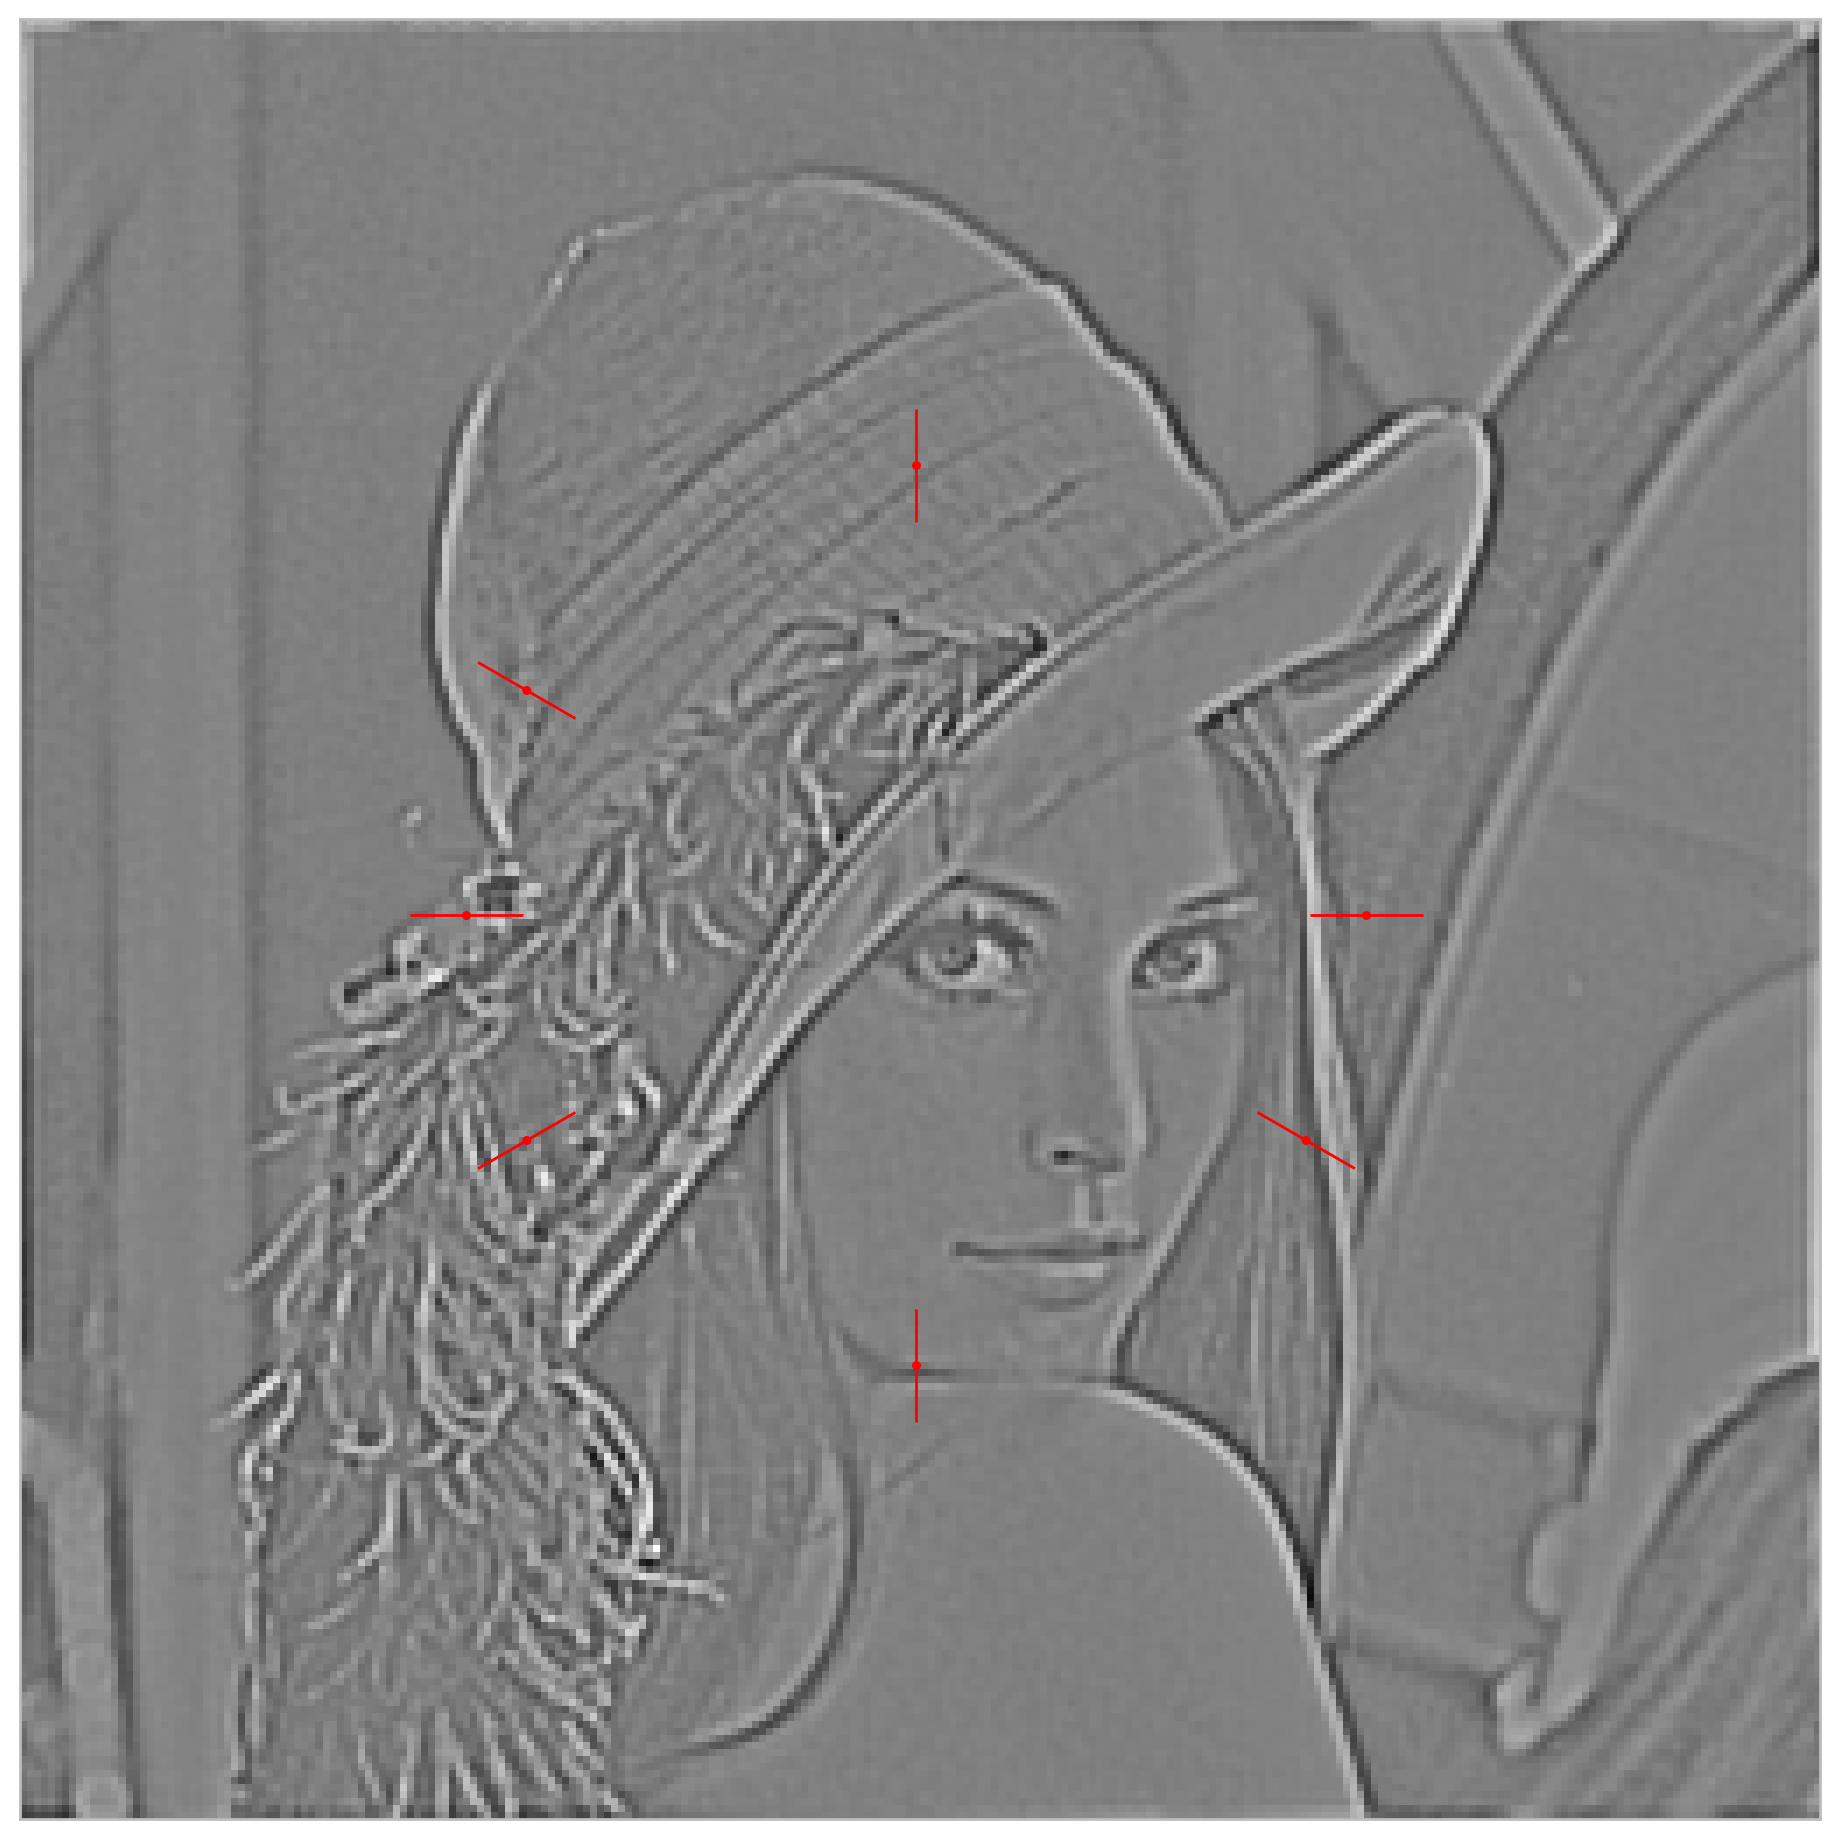

In [9]:
pe = ParameterSet('default_param.py')
from pylab import imread
image = imread('database/lena256.png').mean(axis=-1) 
pe.N_X, pe.N_Y = image.shape
pe.N = 128 # number of edges
pe.figsize_edges = 9

im = Image(pe)
lg = LogGabor(im)
mp = SparseEdges(lg)
edges = np.vstack(((X/2. + .5)*pe.N_X-1, (Y/2. + .5)*pe.N_X-1, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=im.whitening(image))

## Matching Pursuit

### checking basic edge detection

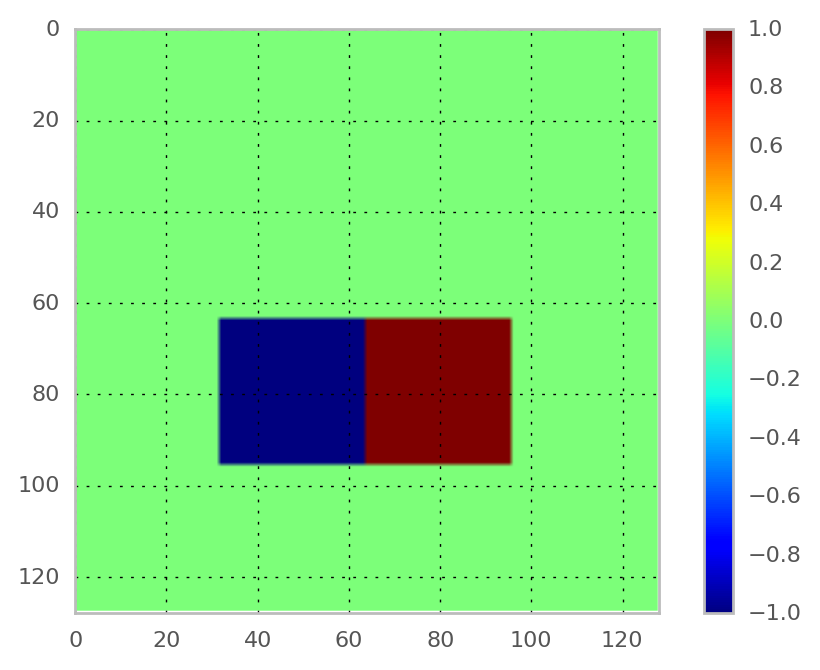

In [10]:
pe = ParameterSet('default_param.py')
pe.N_X = 128 # number of edges
pe.N_Y = 128 # number of edges
#! defining a reference test image (see test_Image)
image = np.zeros((pe.N_X, pe.N_Y))
image[pe.N_X/2:pe.N_X/2+pe.N_X/4, pe.N_X/2:pe.N_X/2+pe.N_X/4] = 1
image[pe.N_X/2:pe.N_X/2+pe.N_X/4, pe.N_X/4:pe.N_X/2] = -1
plt.imshow(image)
v = plt.axis((0, pe.N_Y, pe.N_X, 0))
c = plt.colorbar()

In [13]:
%%writefile test/experiment_test_MP.py
import numpy as np
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges

pe = ParameterSet('default_param.py')
pe.N = 128 # number of edges
pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((pe.N_X, pe.N_Y))
image[pe.N_X/2:pe.N_X/2+pe.N_X/4, pe.N_X/2:pe.N_X/2+pe.N_X/4] = 1
image[pe.N_X/2:pe.N_X/2+pe.N_X/4, pe.N_X/4:pe.N_X/2] = -1

im = Image(pe)
lg = LogGabor(im)
mp = SparseEdges(lg)
matname = 'mat/experiment_test_MP.npy'
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=False)
    np.save(matname, edges)   
fig, a = mp.show_edges(edges, image=im.whitening(image))

Overwriting test/experiment_test_MP.py


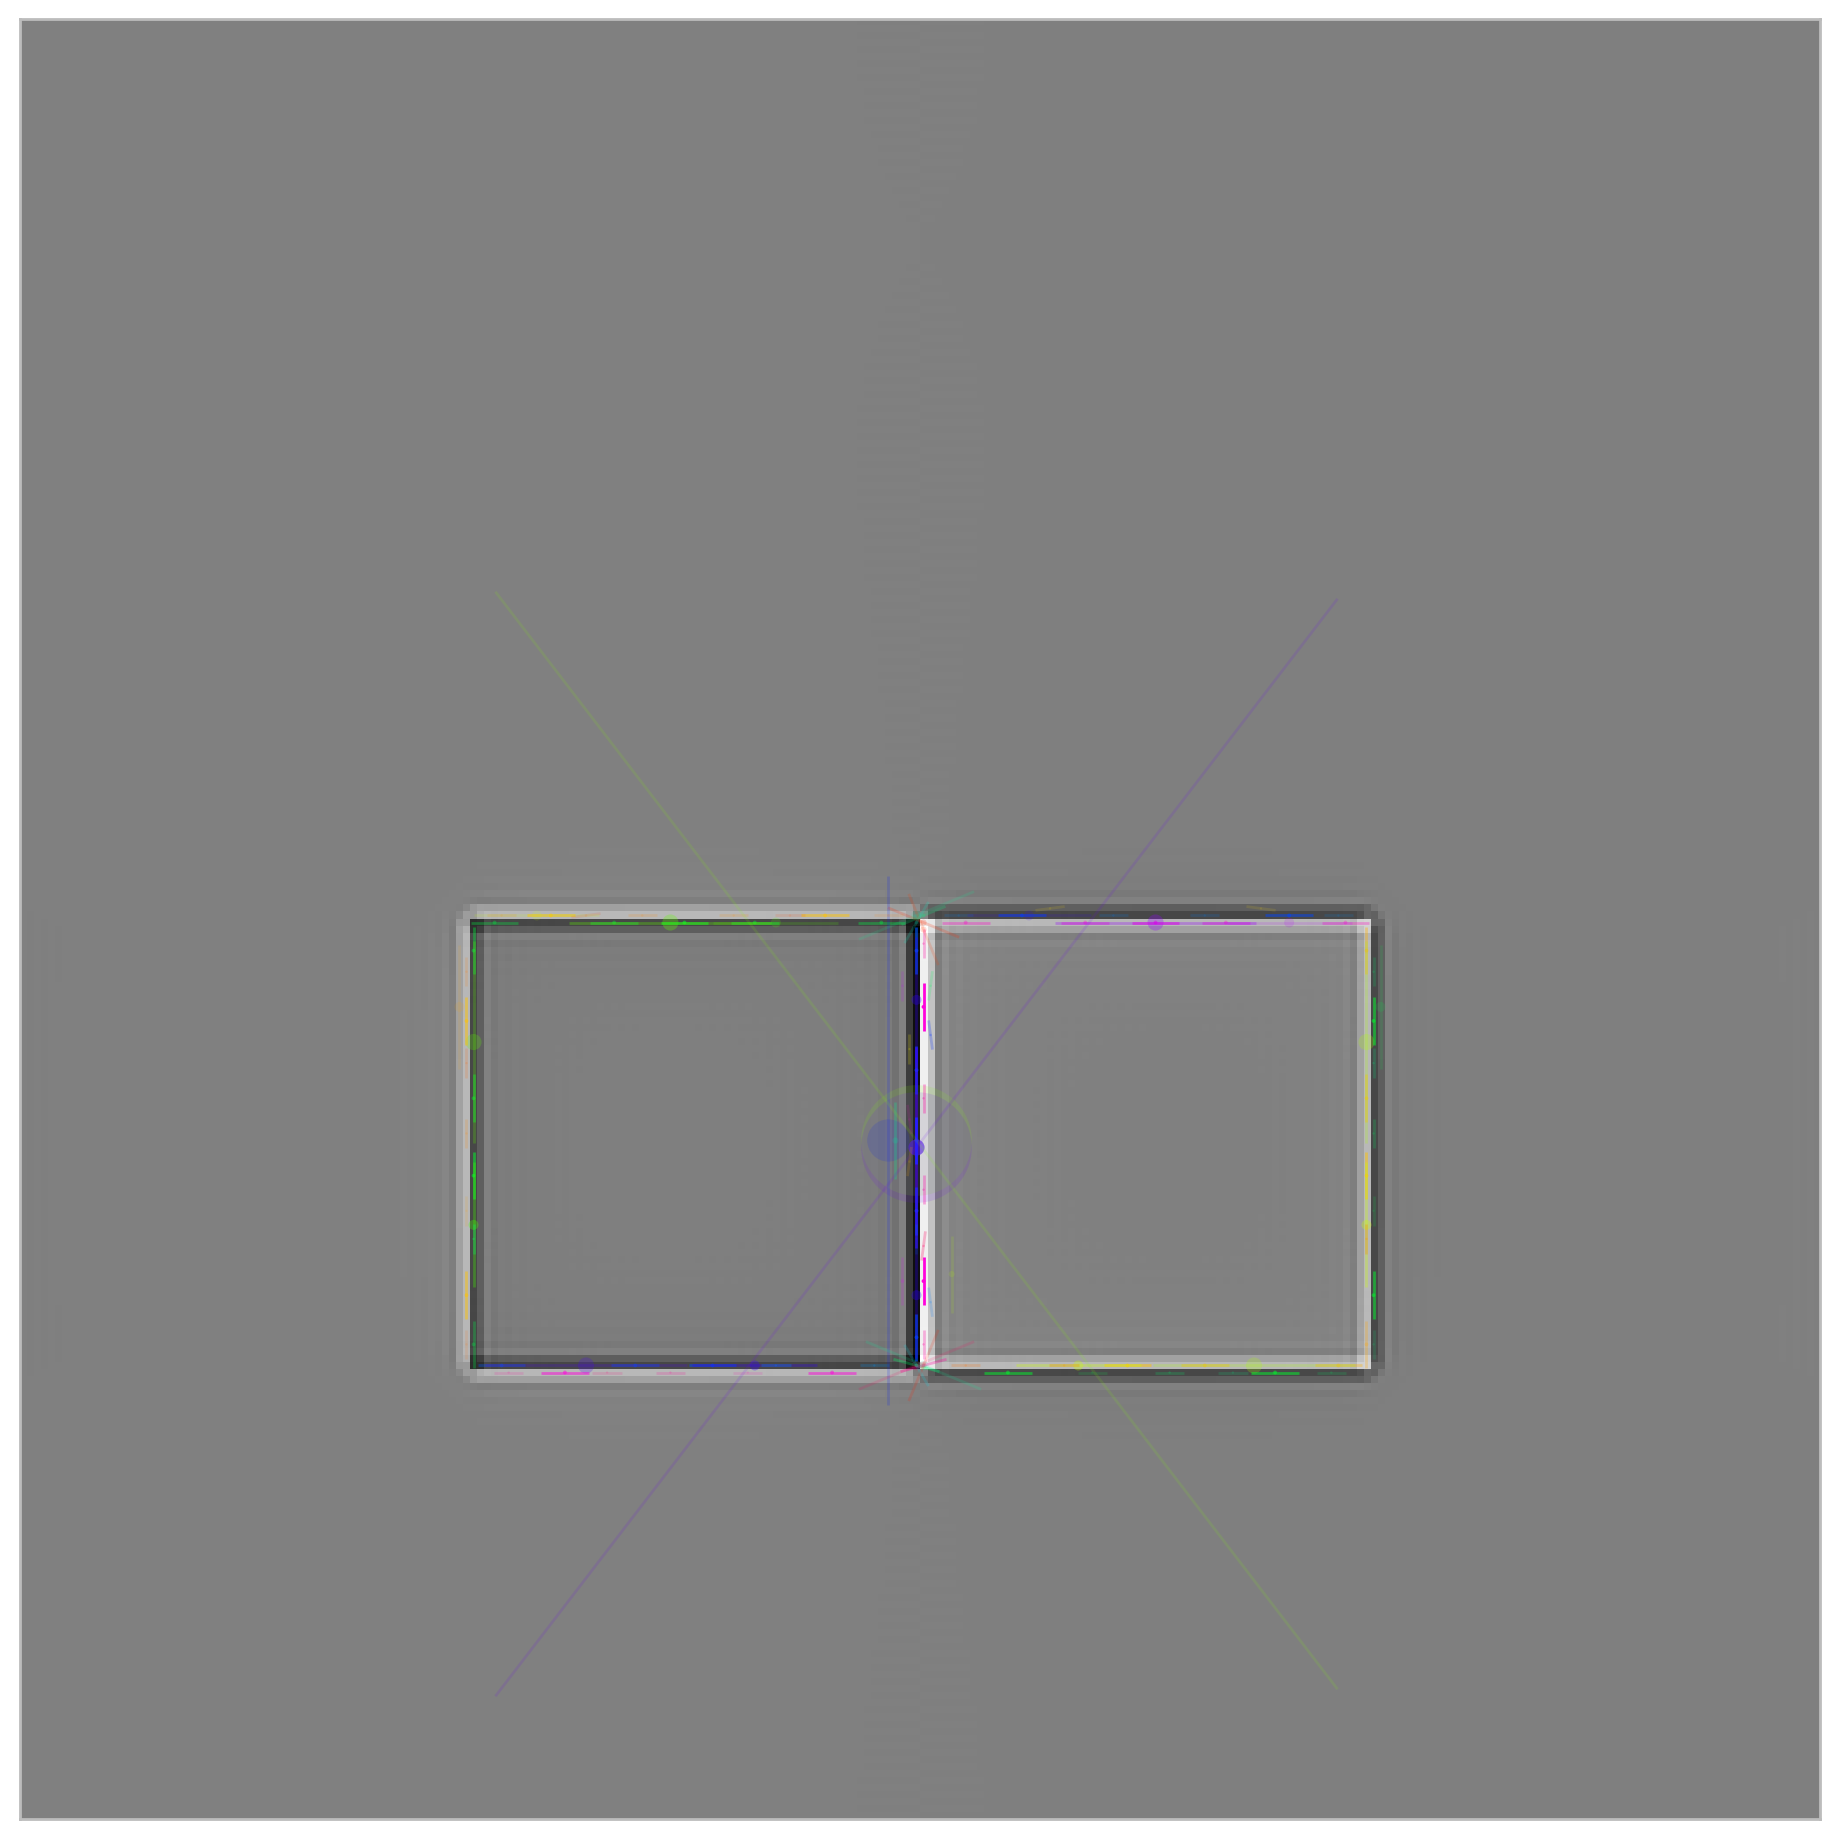

In [14]:
%run test/experiment_test_MP.py

In [21]:
%%writefile test/experiment_test_whitening.py
import numpy as np
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges
pe = ParameterSet('default_param.py')

# defining input image as Lena
from pylab import imread
#image = imread('../AssoField/database/yelmo' + str(pe.N_X) + '.png').mean(axis=-1)#.flipud().fliplr()
image = imread('/Users/lolo/pool/science/PerrinetBednar15/database/serre07_targets/B_N107001.jpg').mean(axis=-1)
#print image.mean(), image.std()

pe.N = 512

im = Image(pe)
image = im.normalize(image, center=True)
#print image.mean(), image.std()

lg = LogGabor(im)
mp = SparseEdges(lg)

matname = 'mat/experiment_test_whitening.npy'
matname_RMSE = 'mat/experiment_test_whitening_RMSE.npy'
try:
    edges = np.load(matname)
    RMSE = np.load(matname_RMSE)
except:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    

    RMSE = np.ones(mp.N)
    image_ = image.copy()
    image_rec = np.zeros_like(image_)
    if mp.do_whitening: image_ = mp.im.whitening(image_)
    for i_N in range(mp.N):
        image_rec += mp.reconstruct(edges[:, i_N][:, np.newaxis])
        RMSE[i_N] =  ((image_*im.mask-image_rec*im.mask)**2).sum()

    np.save(matname_RMSE, RMSE)        

Overwriting test/experiment_test_whitening.py


In [22]:
#!rm mat/experiment_test_whitening*.npy
!ls -l  mat/experiment_test_whitening.npy mat/experiment_test_whitening_RMSE.npy

-rw-r--r-- 1 lolo staff 24656 Feb 24 15:05 mat/experiment_test_whitening.npy
-rw-r--r-- 1 lolo staff  4176 Feb 24 15:05 mat/experiment_test_whitening_RMSE.npy


In [23]:
%run test/experiment_test_whitening.py

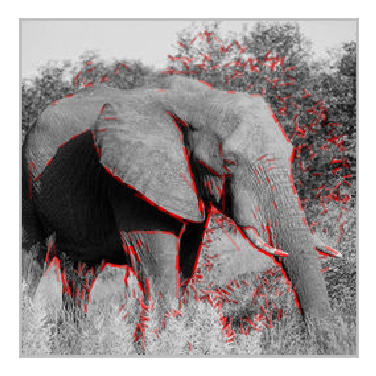

In [24]:
edges = np.load(matname)
#edges[0, :] = pe.N_X - edges[0,:] # HACK
#edges[2, :] = - edges[2,:] # HACK
#edges[:, 119] = edges[:, 118] # HACK
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
pe.figsize_edges = .382 * fig_width
fig, a = mp.show_edges(edges, image=image, color='toto', show_phase=False) #, pedestal=.0, gamma=.3
if not(figpath==''): fig.savefig(figpath + 'SparseLets_A.pdf')


RMSE-W =  0.624565311484


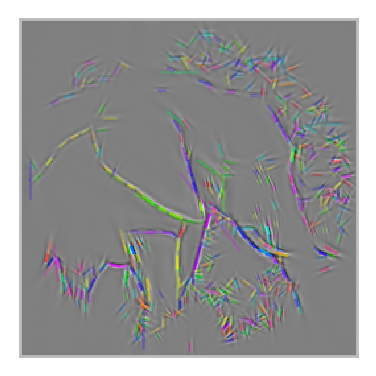

In [25]:
#! recontructing the image from the edges
image_rec = mp.reconstruct(edges)
print('RMSE-W = ', ((im.whitening(image)-image_rec)**2).sum()/((im.whitening(image))**2).sum())
fig, a = mp.show_edges(edges, image=image_rec*1.)

In [26]:
#    RMSE = np.ones(pe.N)
#    for i_N in range(1, pe.N):
#        image_ = mp.reconstruct(edges[:, :i_N])
#        RMSE[i_N] =  ((image_W-image_)**2).sum() / RMSE_0
RMSE= np.load('mat/example_RMSE.npy')
print(RMSE.shape, mp.N)

(512,) 512


-8.13151629364e-20 0.203345262803 52.0563872776 18.5370933556


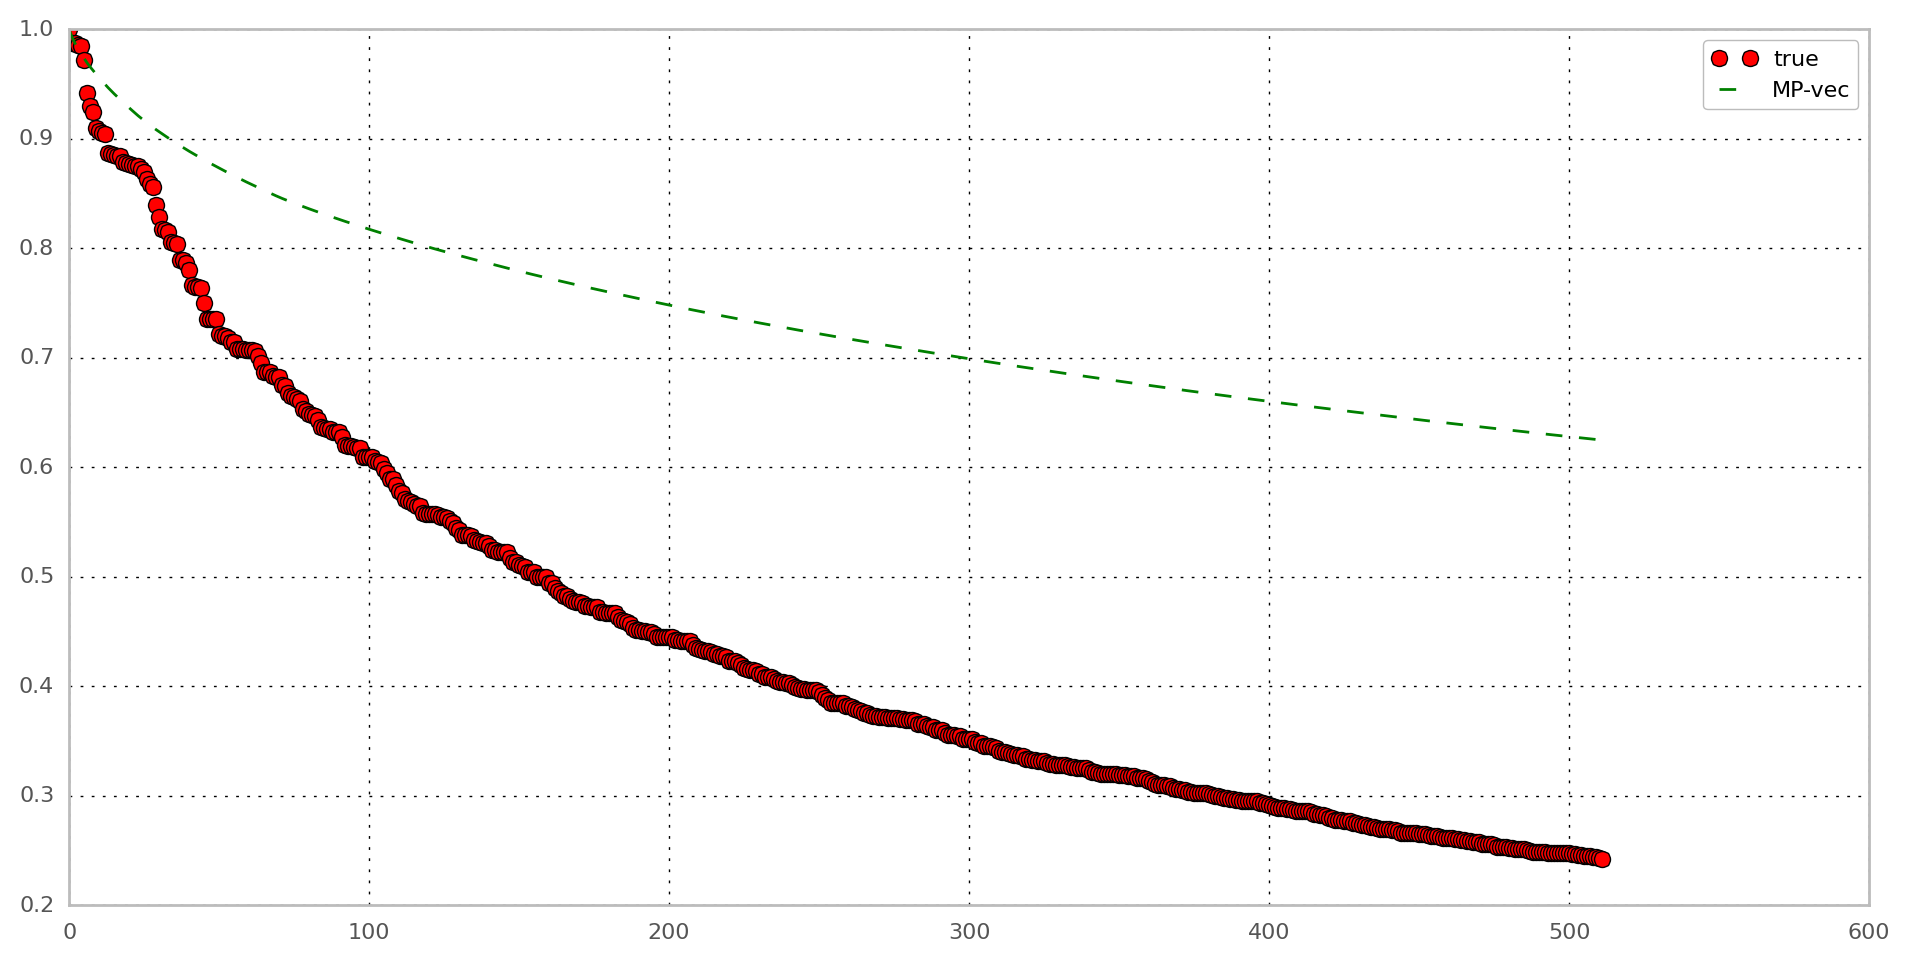

In [27]:
# checking the quick computation of the RMSE in MP
image_W = im.whitening(image)
RMSE_0 = (image_W**2).sum()
print(image_W.mean(), image_W.std(), np.sqrt(RMSE_0), np.sqrt(RMSE[0]))
    

RMSE_MP = np.ones(pe.N)
RMSE_MP[1:] = 1. - np.cumsum(edges[4, :-1]**2) * (2 -  mp.pe.MP_alpha)/mp.pe.MP_alpha / RMSE_0

plt.figure(figsize=(12,6))
plt.subplot(111)
plt.plot(RMSE/RMSE[0], 'ro', label='true')
plt.plot(RMSE_MP, 'g--', label='MP-vec')
plt.legend()

In [32]:
%%writefile test/experiment_test_nowhitening.py
import numpy as np
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges
pe = ParameterSet('default_param.py')

# defining input image as Lena
from pylab import imread
#image = imread('../AssoField/database/yelmo' + str(pe.N_X) + '.png').mean(axis=-1)#.flipud().fliplr()
image = imread('/Users/lolo/pool/science/PerrinetBednar15/database/serre07_targets/B_N107001.jpg').mean(axis=-1)

pe.figsize_edges = 9

im = Image(pe)
image = im.normalize(image, center=True)

lg = LogGabor(im)
mp = SparseEdges(lg)

#! trying now using no whitening of the image
pe.do_whitening = False
im = Image(pe)
lg = LogGabor(im)
mp = SparseEdges(lg)

matname = 'mat/experiment_test_nowhitening.npy'
matname_RMSE = 'mat/experiment_test_nowhitening_RMSE.npy'
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    
    
fig, a = mp.show_edges(edges, image=image)

Overwriting test/experiment_test_nowhitening.py


In [ ]:
%run test/experiment_test_nowhitening.py

[  0 %] elapsed[sec]: 0.938 | ETA[sec]: 1920.739 

Edge 0 / 2048  - Max activity  :  70.6174218174  phase=  -30.2360213261  deg,  @  (244, 160, 10, 10)
Edge

[  0 %] elapsed[sec]: 5.464 | ETA[sec]: 5589.662 

 1 / 2048  - Max activity  :  40.0374154692  phase=  -116.968947546  deg,  @  (123, 248, 3, 10)
Edge

[  0 %] elapsed[sec]: 9.976 | ETA[sec]: 6800.279 

 2 / 2048  - Max activity  :  27.849409389  phase=  -161.881297564  deg,  @  (150, 113, 13, 10)
Edge

[  0 %] elapsed[sec]: 14.490 | ETA[sec]: 7404.630 

 3 / 2048  - Max activity  :  22.5581849591  phase=  119.596322949  deg,  @  (108, 69, 1, 10)
Edge

[  0 %] elapsed[sec]: 19.060 | ETA[sec]: 7787.930 

 4 / 2048  - Max activity  :  22.2916643602  phase=  98.9542322744  deg,  @  (199, 204, 16, 10)
Edge

[  0 %] elapsed[sec]: 23.580 | ETA[sec]: 8024.953 

 5 / 2048  - Max activity  :  21.078294606  phase=  22.283817941  deg,  @  (134, 114, 5, 8)
Edge

[  0 %] elapsed[sec]: 28.075 | ETA[sec]: 8185.928 

In [ ]:
#! recontructing the image from the edges
image_ = mp.reconstruct(edges)
print('RMSE = ', ((image-image_)**2).sum()/((image)**2).sum())
fig, a = mp.show_edges(edges, image=image_*1.)

In [ ]:
%%writefile test/experiment_test_parameters.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
"""

Doing the real stuff: taking a bunch of images, computing edges and then doing
statistics on that.

rm -fr mat/edges/testing_* mat/testing_* figures/edges/testing_* figures/testing_*
frioul_batch  -n "14,15,16"  -M 36 'python experiment_test_parameters.py'
frioul_batch -M 200 'python experiment_test_parameters.py'

"""
__author__ = "(c) Laurent Perrinet INT - CNRS"
import matplotlib
matplotlib.use("Agg") # agg-backend, so we can create figures without x-server (no PDF, just PNG etc.)

import numpy as np
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges, plot
from NeuroTools.parameters import ParameterSet
pe = ParameterSet('default_param.py')
FORMATS = ['pdf', 'eps']

def init_pe(pe, N_X=pe.N_X, N_image=pe.N_image, N=pe.N):
    pe.datapath = '/Users/lolo/pool/science/PerrinetBednar15/database/'
    pe.N_image = N_image
    pe.N_X = N_X
    pe.N = N
    im = Image(pe)
    lg = LogGabor(im)
    mp = SparseEdges(lg)
    return mp

# TODO: here, we are more interested in the processing of the database, not the comparison - use the correct function
# TODO : annotate the efficiency of different LogGabor bases (RMSE?)
# TODO: make a circular mask to avoid border effects coming with whitening...

#! comparing databases
#!--------------------
mp = init_pe(pe)
mp.process('testing_vanilla')
mp.process('testing_noise', noise=pe.noise)
mp.process('testing_vanilla', name_database='serre07_targets')

pe = ParameterSet('default_param.py')

# TODO : make an experiment showing that using scale does not bring much

import matplotlib.pyplot as plt
fig_width_pt = 318.670*.61 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

mps, experiments = [], []
v_alpha = np.linspace(0.3, 1., 9)
for MP_alpha in v_alpha:
    pe = ParameterSet('default_param.py')
    pe.MP_alpha = MP_alpha
    mp = init_pe(pe, N=512)
    exp = 'testing_MP_alpha_' + str(MP_alpha).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)

threshold = None
threshold = .25
databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % MP_alpha for MP_alpha in v_alpha]
fig = plt.figure(figsize=(fig_width, fig_width/1.618))
fig, a, ax = plot(mps=mps,
                  experiments=experiments, databases=databases, labels=labels, 
                  fig=fig, color=[0., 1., 0.], threshold=threshold, scale=True)    
a.set_xlabel(r' $\alpha$')
for ext in FORMATS: fig.savefig(mp.pe.figpath + 'testing_alpha.' + ext)
        
## TODO:  would be interesting to see how that changes with number of image patches used, i.e. whether it settles down to that particular pattern or just jumps around.


In [ ]:
%run test/experiment_test_parameters.py

[Back to top](#SparseEdges)

## some book keeping for the notebook

In [ ]:
%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py
%load_ext watermark
%watermark

In [ ]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

In [ ]:
# CSS styling within IPython notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()